Use PCA to compress images, purpose of PCA is for dimensionality reduction.  It's an unsupervised learning algorithm that we can use to reduce dimension of data.

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [17]:
## cv2 images are in CGB by default, convert to RGB
img = cv2.cvtColor(cv2.imread('/Users/Justin/Desktop/FALL2022/MAT494/JupyterNotebook/dice.jpeg'), cv2.COLOR_BGR2RGB)

In [18]:
img.shape

(600, 600, 3)

Three means there are 3 channels, and 600x600 is the resolution.  We can look at this like a dataframe.  600 rows and 600 columns, the goal is to reduce the column

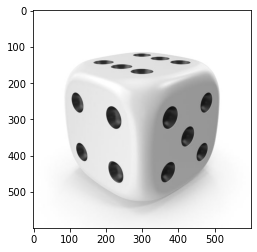

In [19]:
plt.imshow(img)

In [21]:
r,g,b = cv2.split(img) #split the image into RGB

In [22]:
r,g,b = r/255, g/255, b/255

In [45]:
pca_components = 50

pca_r = PCA(n_components = pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components = pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components = pca_components)
reduced_b = pca_b.fit_transform(b)

In [46]:
reduced_r.shape

(600, 50)

In [47]:
combined = np.array([reduced_r, reduced_g, reduced_b])

In [48]:
#reconstructed red channel

reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

#how well did it reconstruct it?

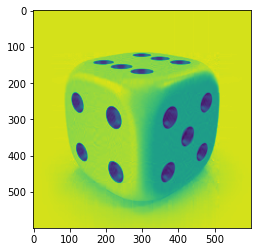

In [49]:
plt.imshow(reconstructed_r)

In [50]:
img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


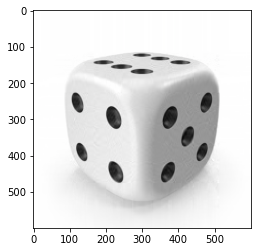

In [51]:
plt.imshow(img_reconstructed)

only needed 50 components to show the same picture, the resolution quality is almost alike.